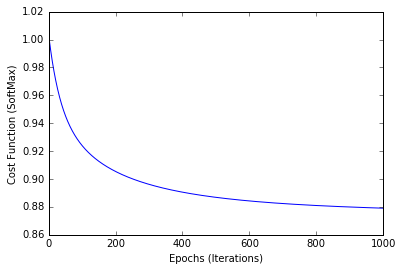

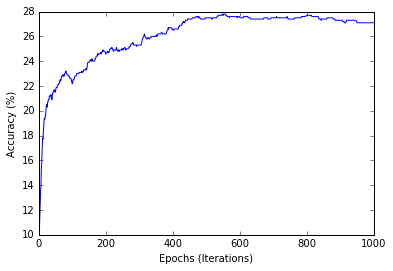

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np



# =============================================
#
# load cifar-10-small and project down
#
 
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
def L_i_logSoftMaxLoss(weights, features, labels):
    #score are 10 x 1000
    scores = weights.dot(features.T)
    exp = np.exp(scores)
    
    maxes = exp.argmax(axis=0)
    
    normalize = exp / np.exp(scores).sum(axis=0)
    #losses are 10 x 1000
    losses = -np.log10(normalize)
    
    #find accuracy for finding max
    substractions = labels.flatten() - maxes
    accuracy = ((1000-np.count_nonzero(substractions))/1000.0)*100
    #print accuracy
    
    hotVector = np.eye(10)[labels.flatten()]
    probabilities = hotVector * losses.T
    probabilities = probabilities.sum(axis=1)
    loss = probabilities.mean()
    return loss, accuracy
    


def numerical_gradient( lossfunction, weights, features, labels):
    loss, accuracy = lossfunction(weights, features, labels)
    delta = 0.0001
    
    gradient = np.zeros((10, 11))
    
    for row in range(0, 10):
        for col in range(0, 11):
            original_weight = weights[row][col]
            weights[row][col] = weights[row][col] + delta
            lossForChange, acc = lossfunction(weights, features, labels)
            gradient[row][col] = (lossForChange - loss) / delta
            #change back to original weight
            weights[row][col] = original_weight
           
                      
            
    return loss,gradient,accuracy
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]

# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
features = np.append(features, np.ones([len(features), 1]), 1)


rows = 10
cols = 11
weights = (np.random.rand(rows, cols) *0.1-0.01)


NUM_EPOCHS = 1000
step_size = 0.1
loss =[]
accuracies = []
for i in range(0,NUM_EPOCHS):
    loss_function_value, grad, accuracy = numerical_gradient( L_i_logSoftMaxLoss, weights, features, labels)
    loss.append(loss_function_value)
    accuracies.append(accuracy)
    weights = weights - step_size * grad

    
listOfIterations = range(1, 1001)
#print listOfIterations
#print loss
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Cost Function (SoftMax)")
plt.plot(listOfIterations, loss)
plt.show()

plt.xlabel("Epochs (Iterations)")
plt.ylabel("Accuracy (%)")
plt.plot(listOfIterations, accuracies)
plt.show()








